# Réseau convolutif

Objectif : construction d'un réseau convolutif simple avec Keras. 
De nombreuses possibilités d'amélioration :
- optimisation du nombre de couches / noyaux / activations
- architecture
- régularisation
- ...

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam


# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape(num_examples, img_size, img_size, 1)/255
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)/255

print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

# Conversion en matrices binaires
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


# Définition du réseau

## Paramètres

In [4]:
lr = 0.001
num_epochs = 25
batch_size = 128
dropout = 0.75 # ici probabilité de garder le neurone

## Types de couches

## Modèle du réseau construit 
CONV1-RELU-MAX POOLING - CONV2-RELU-MAX POOLING-FCL-Dropout-Prediction

In [5]:
#TODO

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 24, 24, 32)        832       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 12, 12, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 8, 8, 64)          51264     
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 4, 4, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
Dropout (Dropout)            (None, 1024)             

## Fonction de coût et optimisation

In [6]:
#TODO

# Entraînement du réseau

In [7]:
#TODO

Epoch 1/25
469/469 [==============================] - 17s 36ms/step - loss: 0.2063 - acc: 0.9352 - val_loss: 0.0419 - val_acc: 0.9864
Epoch 2/25
469/469 [==============================] - 18s 38ms/step - loss: 0.0576 - acc: 0.9824 - val_loss: 0.0274 - val_acc: 0.9911
Epoch 3/25
469/469 [==============================] - 19s 41ms/step - loss: 0.0423 - acc: 0.9869 - val_loss: 0.0275 - val_acc: 0.9908
Epoch 4/25
469/469 [==============================] - 20s 42ms/step - loss: 0.0328 - acc: 0.9900 - val_loss: 0.0190 - val_acc: 0.9935
Epoch 5/25
469/469 [==============================] - 22s 46ms/step - loss: 0.0271 - acc: 0.9918 - val_loss: 0.0205 - val_acc: 0.9941
Epoch 6/25
469/469 [==============================] - 22s 48ms/step - loss: 0.0237 - acc: 0.9926 - val_loss: 0.0205 - val_acc: 0.9938
Epoch 7/25
469/469 [==============================] - 22s 48ms/step - loss: 0.0222 - acc: 0.9934 - val_loss: 0.0197 - val_acc: 0.9941
Epoch 8/25
469/469 [==============================] - 23s 50ms

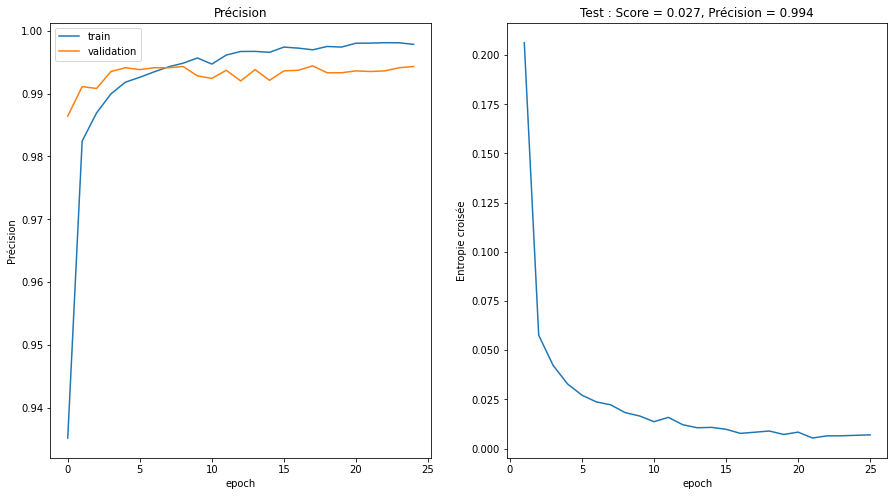

<Figure size 432x288 with 0 Axes>

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1,2,2)
x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

Nombre d'erreurs 57/10000




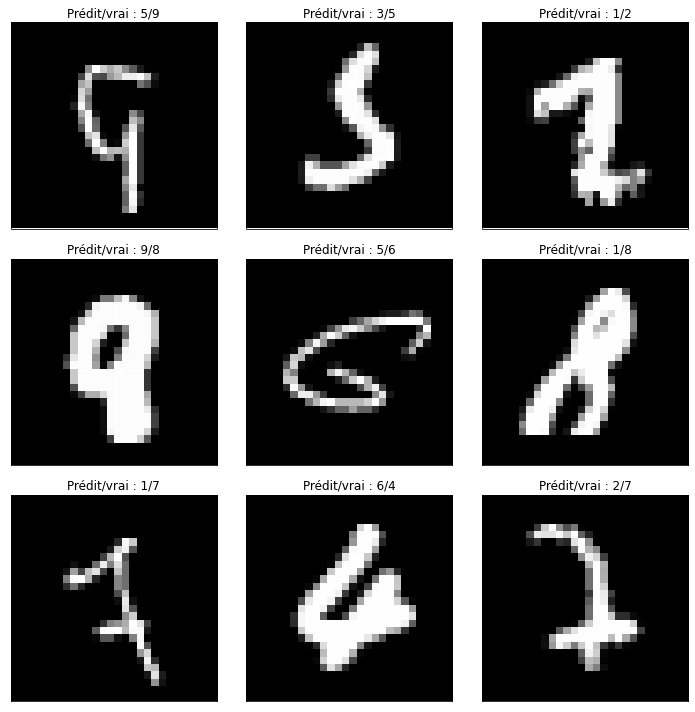

In [23]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
